In [4]:
import pandas as pd
import json

In [5]:
articles = '../text_matcher/finaldata.jsonl'
with open(articles) as f: 
    rawData = f.readlines()

# Parse the data. 
data = [json.loads(line) for line in rawData]

df = pd.DataFrame(data)
# Drop the irrelevant columns and rows with no matches
df = df.drop(['id', 'url', 'outputFormat', 'volumeNumber', 'subTitle', 'provider', 'datePublished', \
              'pagination', 'pageEnd', 'pageStart'], axis=1)
articlesWithMatches = df[df['numMatches'].apply(lambda x: x > 0)]
articlesWithMatches

,abstract,creator,docSubType,docType,identifier,isPartOf,issueNumber,language,pageCount,publicationYear,publisher,sourceCategory,tdmCategory,title,wordCount,numMatches,Locations in A,Locations in B
0,This paper investigates the logic of explanati...,[Merje Kuus],research-article,article,"[{'name': 'issn', 'value': '00202754'}, {'name...",Transactions of the Institute of British Geogr...,1,[eng],12,2007,Royal Geographical Society (with the Institute...,"[Geography, Social Sciences]",[Philosophy - Applied philosophy],Ubiquitous Identities and Elusive Subjects: Pu...,9633,1,"[[101032, 101482]]","[[11865, 12316]]"
1,Seeking to elucidate understandings of sexual ...,[Rebecca M. Herzig],research-article,article,"[{'name': 'issn', 'value': '10400656'}, {'name...",NWSA Journal,3,[eng],17,2000,The Johns Hopkins University Press,"[Feminist & Women's Studies, Social Sciences]","[Social sciences - Communications, Philosophy ...",The Woman beneath the Hair: Treating Hypertric...,7509,2,"[[74475, 74701], [476453, 476563]]","[[4347, 4571], [43201, 43311]]"
2,None,None,research-article,article,"[{'name': 'issn', 'value': '11440821'}, {'name...",Rue Descartes,40,[fre],5,2003,Presses Universitaires de France,"[Humanities, Philosophy]",None,Références bibliographiques des ouvrages et ar...,1510,1,"[[481404, 481466]]","[[6685, 6747]]"
6,None,[Kathryn R. King],research-article,article,"[{'name': 'issn', 'value': '01935380'}, {'name...",The Eighteenth Century,2,[eng],18,1994,University of Pennsylvania Press,"[Language & Literature, History, History, Huma...",[Arts - Literature],THE UNACCOUNTABLE WIFE AND OTHER TALES OF FEMA...,8626,1,"[[143468, 143592]]","[[23255, 23380]]"
7,None,[Chicago Cultural Studies Group],research-article,article,"[{'name': 'issn', 'value': '00931896'}, {'name...",Critical Inquiry,3,[eng],26,1992,The University of Chicago Press,"[Language & Literature, Social Sciences, Cultu...",[Philosophy - Applied philosophy],Critical Multiculturalism,12324,1,"[[481404, 481471]]","[[77772, 77838]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,None,[Judy Tobler],research-article,article,"[{'name': 'issn', 'value': '10117601'}, {'name...",Journal for the Study of Religion,1/2,[eng],30,2000,Association for the Study of Religion in South...,"[Religion, Humanities]",[Philosophy - Applied philosophy],"""Home is Where the Heart Is?"": Gendered Sacred...",13997,4,"[[446805, 446947], [481756, 481815], [495817, ...","[[41303, 41445], [84793, 84852], [85260, 85315..."
5171,None,"[Andreas Spiegl, Fiona Elliot]",research-article,article,"[{'name': 'issn', 'value': '14654253'}, {'name...","Afterall: A Journal of Art, Context and Enquiry",3,[eng],8,2001,University of Chicago Press,"[Art & Art History, Arts]","[Arts - Literature, Arts - Art history]",A CONFLICT AT THE VERY HEART OF THE IDENTIFICA...,5552,2,"[[432496, 432753], [439768, 439971]]","[[27504, 27761], [27972, 28178]]"
5175,None,[Sonia Núñez Puente],research-article,article,"[{'name': 'issn', 'value': '02721635'}, {'name...",Anales de la literatura española contemporánea,2,[spa],22,2009,Society of Spanish & Spanish-American Studies,"[Language & Literature, Latin American Studies...",None,"Corporalidad(es) y cibercuerpos en ""Te quiero,...",7684,1,"[[493724, 493799]]","[[45214, 45288]]"
5178,None,[David Chioni Moore],research-article,article,"[{'name': 'issn', 'value': '00917710'}, {'name...",Journal of Anthropological Research,4,[eng],21,1994,University of New Mexico,"[Anthropology, Social Sciences]","[Philosophy - Epistemology, Arts - Literature,...","Anthropology Is Dead, Long Live Anthro(a)polog...",9799,1,"[[147640, 147832]]","[[16061, 16251]]"


## What portions of texts are most quoted? (aka first-half, first-quarter, last-third) Does this change across genres?

2665
0 124
1 306
2 304
3 66
4 81
5 48
6 43
7 90
8 599
9 1004


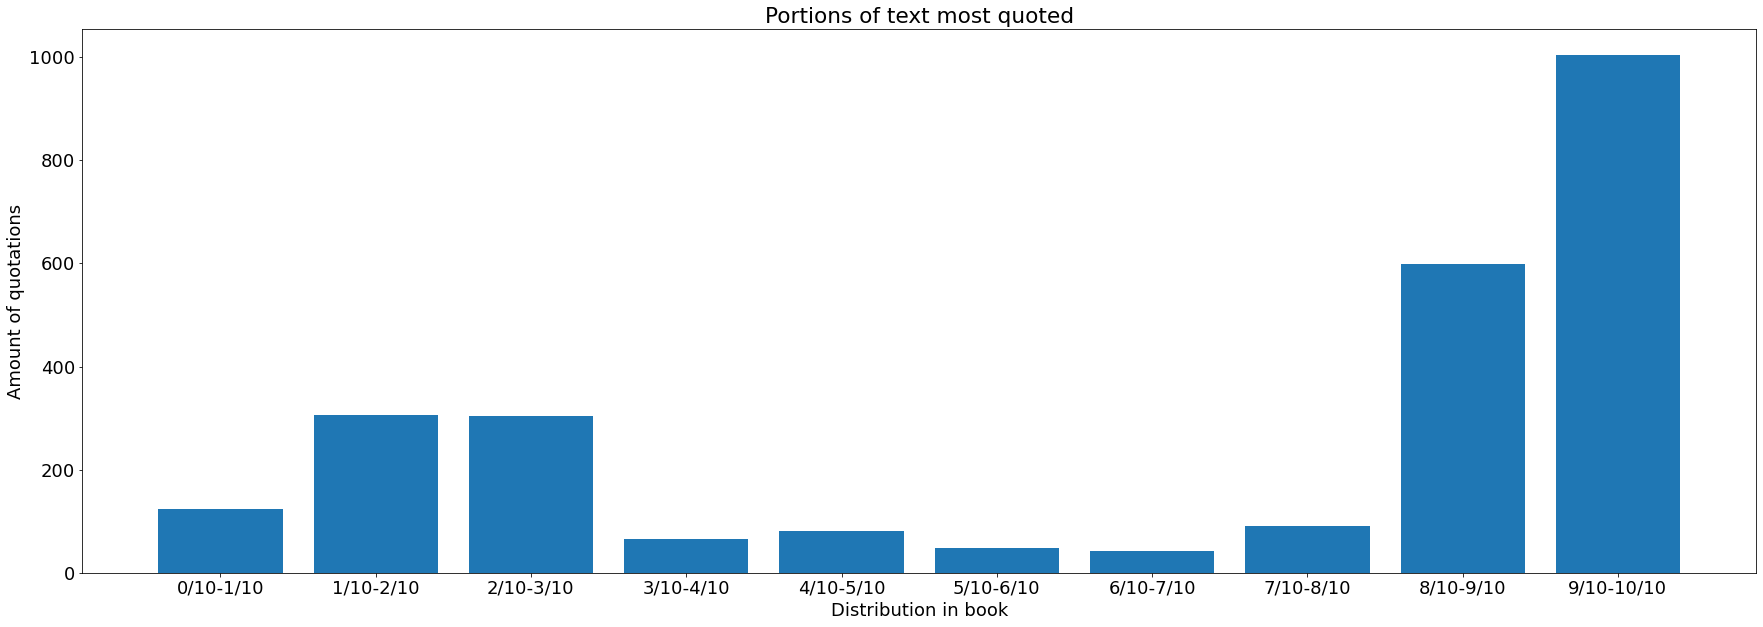

In [80]:
import matplotlib.pyplot as plt

genderRaw = '../visualization/gender_trouble_pages.txt'
total_char_count = 0
with open(genderRaw) as f: 
    for line in f:
        total_char_count += len(line)

total_char_count

def divideBySections(amount):
    text_occurrance, rangeBreakdown, xLabels = {}, [], []

    for i in range(0, amount):
        text_occurrance[str(i)] = 0
        rangeBreakdown.append(((total_char_count/amount)*(i), (total_char_count/amount)*(i+1)))
        xLabels.append(f"{i}/{amount}-{i+1}/{amount}")

    return text_occurrance, rangeBreakdown, xLabels

def plotPortionsOfQuotes(amount):

    text_occurrance, rangeBreakdown, xLabels = divideBySections(amount)

    for index, row in articlesWithMatches.iterrows():
        for (quot_start,quot_end) in row['Locations in A']:
            for index,values in enumerate(rangeBreakdown):
                if (values[0]<=quot_start<=values[1]):
                    text_occurrance[str(index)] += 1

    total_occ = sum(text_occurrance.values())
    print(total_occ)
    for (key, val) in text_occurrance.items():
        print(key,val)


    plt.figure(facecolor='white')
    plt.bar(range(len(text_occurrance)), list(text_occurrance.values()),tick_label=xLabels)

    plt.xlabel("Distribution in book")
    plt.ylabel("Amount of quotations")
    plt.rcParams["figure.figsize"] = (30,10)
    plt.rcParams.update({'font.size': 18})
    plt.title("Portions of text most quoted")

    plt.show()


distributionCount = 10
plotPortionsOfQuotes(distributionCount)

## Which sourceCategory of books are most quoted/ which genres are least quoted?